In [1]:
import numpy as np
import pandas as pd

fileName = 'ArduMLRS-2023-10-27-134949'

df = pd.read_csv(f'{fileName}.csv')

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a)) * 1000

In [2]:
# Home distance calculation
df[['GPS_LAT', 'GPS_LON']] = df['GPS'].str.split(' ', expand=True).astype(float)                    # Split the GPS field into Lat and Lon
df['HOME_GPS_LAT'] = df['GPS_LAT'].iloc[0].astype(float)                                            # Set the home GPS lat
df['HOME_GPS_LON'] = df['GPS_LON'].iloc[0].astype(float)                                            # Set the home GPS lon
df['HOME_DIST'] = haversine(df['HOME_GPS_LAT'], df['HOME_GPS_LON'], df['GPS_LAT'], df['GPS_LON'])   # Calculate distance to home

In [3]:
# Relative altitude calculation
df['HOME_Alt(m)'] = df['Alt(m)'].iloc[0].astype(float)
df['Rel_Alt(m)'] = df['Alt(m)'] - df['HOME_Alt(m)']

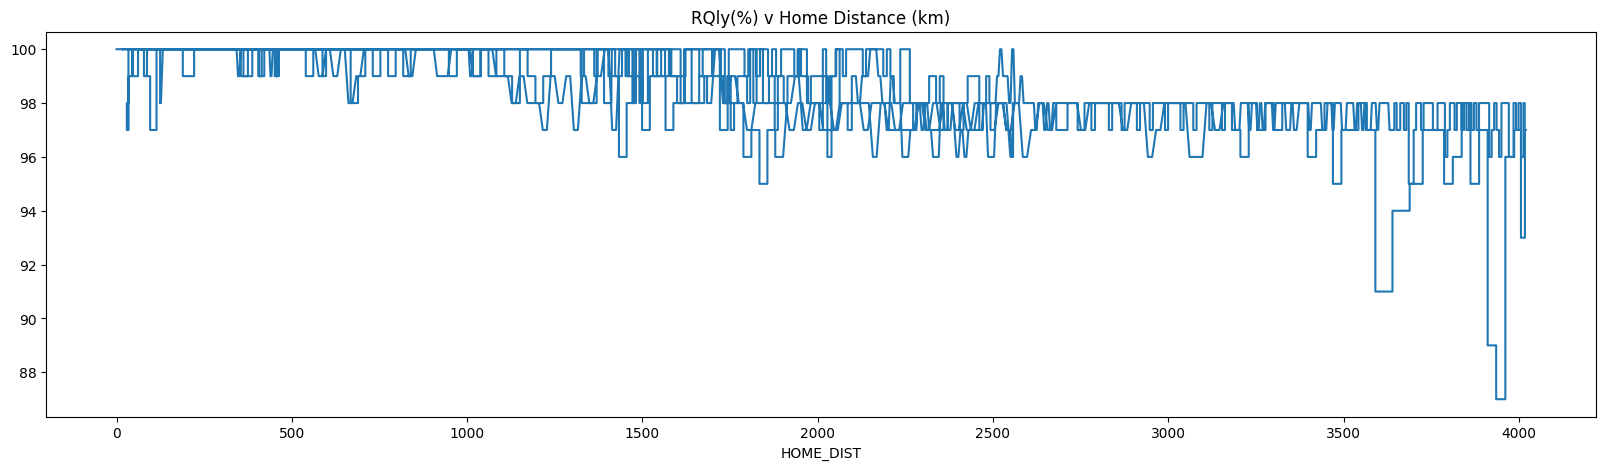

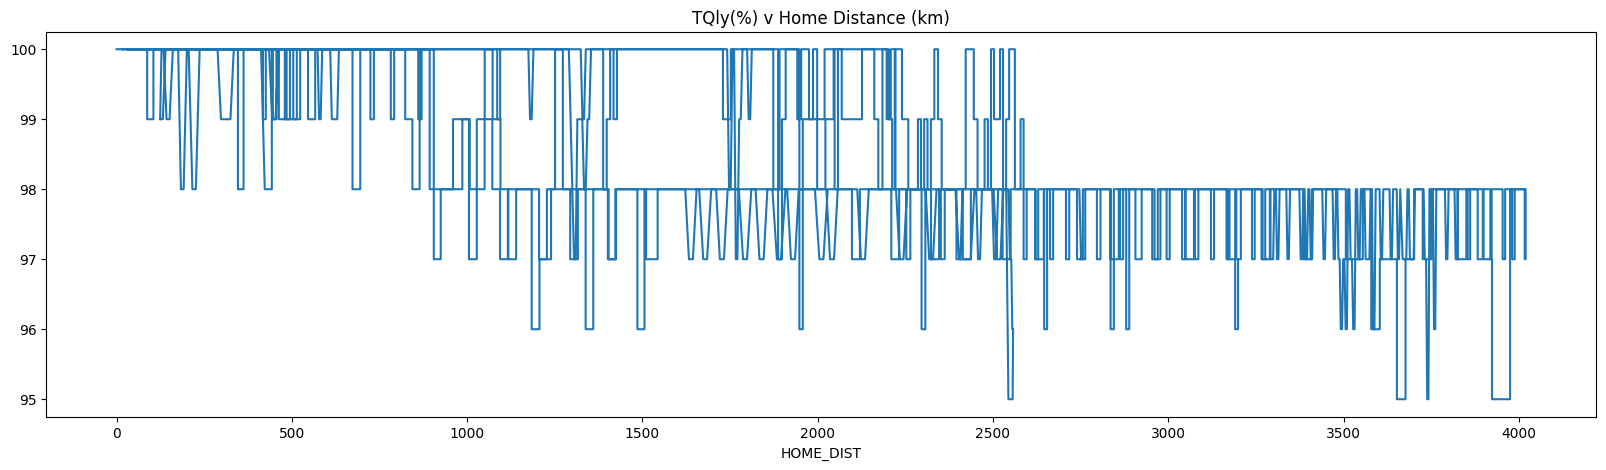

In [4]:
#df.to_csv(f'{fileName}Out.csv', index=False)

import matplotlib.pyplot as plt

df.plot(x = 'HOME_DIST', y = 'RQly(%)', kind = 'line', legend=False, figsize=(20,5))
plt.title('RQly(%) v Home Distance (km)')
plt.show()
df.plot(x = 'HOME_DIST', y = 'TQly(%)', kind = 'line', legend=False, figsize=(20,5))
plt.title('TQly(%) v Home Distance (km)')
plt.show()